In [1]:
import pandas as pd
import numpy as np

tasks = ('cleanHouse', 'fourCorners', 'harvester', 'randomMaze', 'stairClimber', 'topOff')

df = {}
grouped_data = {}
for task in tasks:
    df[task] = pd.read_csv(f'dt-{task}.csv')

    # Group data by 'iteration' and 'reward'
    grouped_data[task] = df[task].groupby('iteration')['reward'].apply(list)

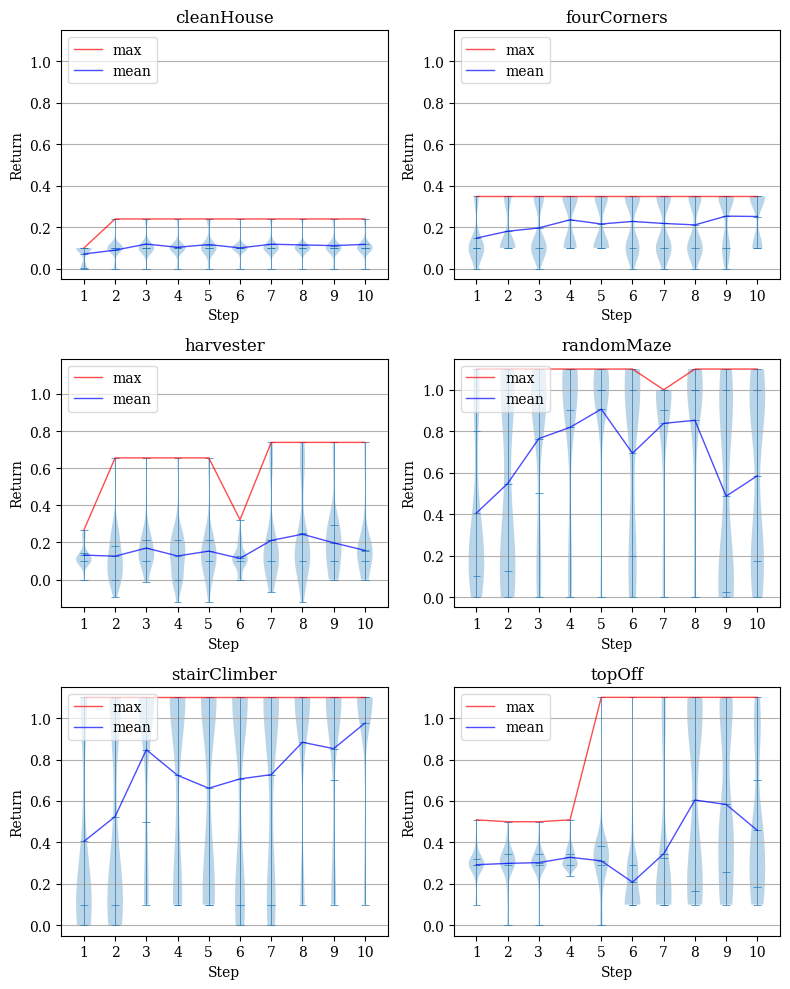

In [85]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))

for ax, task in zip(axes.flatten(), tasks):
    # violin plot
    parts = ax.violinplot(grouped_data[task].values, showmeans=True, quantiles=[[0.25, 0.75]] * len(grouped_data[task]))
    for partname in ('cbars', 'cmins', 'cmaxes', 'cmeans', 'cquantiles'):
        vp = parts[partname]
        vp.set_linewidth(0.5)

    # highlight max return
    max_line = ax.plot(grouped_data[task].index, grouped_data[task].apply(max), color='red', alpha=0.7, label="max", linewidth=1)
    mean_line = ax.plot(grouped_data[task].index, grouped_data[task].apply(np.mean), color='blue', alpha=0.7, label="mean", linewidth=1)
    # for iteration in grouped_data[task].index:
    #     ax.scatter(iteration, max(grouped_data[task][iteration]), s=8, color='red', alpha=0.7)

    # Customize the plot
    ax.set_title(task)
    ax.set_xlabel('Step')
    ax.set_ylabel('Return')
    ax.set_xticks(grouped_data[task].index)
    ax.set_xticklabels(grouped_data[task].index)  # Set iteration numbers as x-axis labels
    ax.set_ylim([-0.15, 1.19]) if task == 'harvester' else ax.set_ylim([-0.05, 1.15])
    ax.legend(loc='upper left', framealpha=0.7)
    ax.grid(visible=True, axis='y', zorder=0)

plt.tight_layout()

# Save and display the plot
plt.savefig('dt_train_violin.pdf')  # Save the plot as a PDF file
plt.show()


In [68]:
grouped_data['cleanHouse']
max_values = grouped_data['cleanHouse'].apply(max)
print(max_values)


iteration
1     0.10
2     0.24
3     0.24
4     0.24
5     0.24
6     0.24
7     0.24
8     0.24
9     0.24
10    0.24
Name: reward, dtype: float64


In [3]:
for task in tasks:
    unique_progs = df[task]['program'][df[task]['iteration'] == 10].unique()
    print(task, len(unique_progs))

cleanHouse 43
fourCorners 51
harvester 31
randomMaze 33
stairClimber 14
topOff 25
